In [ ]:
! gdown 1FXF5p_F5EiCX9kab08thShq4KIMdf5CJ
! gdown 1fcFN2lO_hbPHJ8q52DHMLqLXxo2AeIeq

In [ ]:
!pip install rdkit

In [ ]:
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import IPythonConsole

In [ ]:
df = pd.read_excel('/content/35000.xlsx')

In [ ]:
df.tail()

,Unnamed: 0,Title,IC50,SMILES
36372,NaN,CHEMBL3699085,2366.79,CC(=O)N[C@H]1CC[C@@H]([C@@H]12)[C@@H](O[Si](C)...
36373,NaN,CHEMBL109004,2372.10,CC(=O)Nc(cc1)c(OC(=O)C)cc1C(=O)O
36374,NaN,CHEMBL2259758,2600.97,c1cccc(c12)cccc2CNC(=O)CCCCCCO[C@]3(C(=O)O)C[C...
36375,NaN,CHEMBL109781,2793.00,NCCCC(=O)Nc(c(cc1)NC(=O)C)cc1C(=O)O
36376,NaN,CHEMBL3699084,3183.60,CC(=O)N[C@H]1CS(=O)(=O)[C@@H]([C@@H]12)[C@@H](...


In [ ]:
df.head()

,Unnamed: 0,Title,IC50,SMILES
0,NaN,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,NaN,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,NaN,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,NaN,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,NaN,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


In [ ]:
df = df.loc[:df.shape[0]//3:,df.columns[1]:]

In [ ]:
df.tail()

,Title,IC50,SMILES
12121,CHEMBL1489992,2.539,C=CCn1c(nc(O)cc1=O)SCCC
12122,CHEMBL1606549,2.540,c1cccc(Cl)c1OCC(=O)Nc(c2)ccc(c23)OCCO3
12123,CHEMBL1408906,2.540,c1c(Cl)ccc(OC)c1NC(=O)CCc2ccc(cc2)OC
12124,CHEMBL1339522,2.541,c1ccccc1CSc(nn2)n(CC)c2CNc3ccc(Cl)cc3
12125,CHEMBL1603795,2.541,CN(C)\C=C\C(=O)c1ccc(Br)cc1


In [ ]:
df["Title"]

0        CHEMBL2206459
1        CHEMBL3818159
2        CHEMBL1956716
3        CHEMBL1956715
4        CHEMBL4444029
             ...      
12121    CHEMBL1489992
12122    CHEMBL1606549
12123    CHEMBL1408906
12124    CHEMBL1339522
12125    CHEMBL1603795
Name: Title, Length: 12126, dtype: object

In [ ]:
df.head()

,Title,IC50,SMILES
0,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


In [ ]:
df2 = pd.read_excel('1400.xlsx', sheet_name=0)



In [ ]:
df2 = df2[["Title", "IC50, mmg/ml", "SMILES"]]

In [ ]:
df2.shape

(1468, 3)

In [ ]:
df2.head()

,Title,"IC50, mmg/ml",SMILES
0,1007-Ya-213,2.7,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2
1,1007-Ya-213,0.7,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2
2,1008-Ya-187,9.9,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2
3,1009-As-106,8.3,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2
4,1010-Ya-208,39.4,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C


In [ ]:
df2 = df2.rename(columns={'IC50, mmg/ml': 'IC50'})

In [ ]:
df.head()

,Title,IC50,SMILES
0,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


In [ ]:
df2.columns

Index(['Title', 'IC50', 'SMILES'], dtype='object')

In [ ]:
df.columns

Index(['Title', 'IC50', 'SMILES'], dtype='object')

In [ ]:
df2.shape

(1468, 3)

In [ ]:
df = pd.concat([df, df2])

In [ ]:
df["Title"]

0       CHEMBL2206459
1       CHEMBL3818159
2       CHEMBL1956716
3       CHEMBL1956715
4       CHEMBL4444029
            ...      
1463    CHEMBL4251117
1464    CHEMBL4217515
1465    CHEMBL4205814
1466    CHEMBL4212064
1467    CHEMBL4452992
Name: Title, Length: 13594, dtype: object

In [ ]:
df.drop(labels=['Title'], axis=1, inplace=True)
#df = df.iloc[:,:-2]


In [ ]:
df.shape

(13594, 2)

In [ ]:
df["SMILES"]

0       [H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1       O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2       C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3       CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4       O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...
                              ...                        
1463                           CCCCCCCc1c(OC)c(C)c(=O)oc1
1464    COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...
1465    COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...
1466    c1ccc(C([O-])=O)c(c1C([O-])=O)-c(c2)ccc(c23)cc...
1467    CCC(CC)O[C@H](C=C1C(=O)O)[C@H](NC(=O)C)[C@H](C...
Name: SMILES, Length: 13594, dtype: object

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(13594, 2)

In [ ]:
unique_substances = list(df['SMILES'].drop_duplicates())

In [ ]:
new_df = None
for subs in unique_substances:
  subdf = df[df['SMILES'] == subs]
  df.loc[df['SMILES'] == subs, 'IC50'] = np.array([subdf['IC50'].mean()]*subdf.shape[0]).reshape(-1, 1)
  #df.loc[df['SMILES'] == subs, 'CC50-MDCK, mmg/ml'] = np.array([subdf['CC50-MDCK, mmg/ml'].mean()]*subdf.shape[0]).reshape(-1, 1)
  if new_df is None:
    new_df = df[df['SMILES'] == subs].head(1)
  else:
    new_df = pd.concat([new_df, df[df['SMILES'] == subs].head(1)])

In [ ]:
#new_df.drop(labels=['SI'], axis=1, inplace=True)
new_df.shape

(13119, 2)

In [ ]:
descriptors = {"HeavyAtomCount": Descriptors.HeavyAtomCount,
               "NHOHCount": Descriptors.NHOHCount,
               "NOCount": Descriptors.NOCount,
               "NumHAcceptors": Descriptors.NumHAcceptors,
               "NumHDonors": Descriptors.NumHDonors,
               "NumHeteroatoms": Descriptors.NumHeteroatoms,
               "NumRotatableBonds": Descriptors.NumRotatableBonds,
               "NumValenceElectrons": Descriptors.NumValenceElectrons,
               "NumAromaticRings": Descriptors.NumAromaticRings,
               "NumAliphaticHeterocycles": Descriptors.NumAliphaticHeterocycles,
               "RingCount": Descriptors.RingCount,
               "MW": Descriptors.MolWt,
               "LogP": Descriptors.MolLogP,
               "MR": Descriptors.MolMR,
               "TPSA": Descriptors.TPSA}
for k, f in descriptors.items():
  col = [f(Chem.MolFromSmiles(i)) for i in np.array(new_df['SMILES'])]
  new_df.insert(loc=new_df.shape[1], column=k, value=col)
new_df.shape

[08:51:41] Conflicting single bond directions around double bond at index 55.
[08:51:41]   BondStereo set to STEREONONE and single bond directions set to NONE.
[08:51:44] Conflicting single bond directions around double bond at index 55.
[08:51:44]   BondStereo set to STEREONONE and single bond directions set to NONE.
[08:51:47] Conflicting single bond directions around double bond at index 55.
[08:51:47]   BondStereo set to STEREONONE and single bond directions set to NONE.
[08:51:50] Conflicting single bond directions around double bond at index 55.
[08:51:50]   BondStereo set to STEREONONE and single bond directions set to NONE.
[08:51:54] Conflicting single bond directions around double bond at index 55.
[08:51:54]   BondStereo set to STEREONONE and single bond directions set to NONE.
[08:51:57] Conflicting single bond directions around double bond at index 55.
[08:51:57]   BondStereo set to STEREONONE and single bond directions set to NONE.
[08:52:01] Conflicting single bond direc

(13119, 17)

In [ ]:
new_df_copy = new_df.copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
new_df.head()

,IC50,SMILES,HeavyAtomCount,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount,MW,LogP,MR,TPSA
0,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...,24,7,9,4,6,10,7,138,0,0,1,362.367,0.38187,90.4296,157.76
1,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...,21,4,6,4,3,6,7,120,0,0,1,298.383,1.05450,79.7279,101.65
2,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...,21,3,6,5,2,6,7,118,0,0,1,295.359,-0.36170,77.0531,104.48
3,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...,20,3,6,5,2,6,6,114,0,0,1,283.348,-0.52780,72.5301,104.48
4,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...,24,4,9,6,4,9,3,122,3,0,3,329.268,1.09742,81.9775,149.28


In [ ]:
new_df.describe()

,IC50,HeavyAtomCount,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount,MW,LogP,MR,TPSA
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,6.145703,23.919049,1.404756,5.426709,4.697690,1.305968,6.356506,4.372666,124.680235,2.229819,0.484869,3.005412,341.359628,3.115003,92.187838,71.916106
std,32.011777,6.700028,1.469431,2.302800,2.041665,1.299015,2.472930,2.579533,36.065137,1.070189,0.713960,1.155293,94.023974,1.461593,24.959401,34.600609
min,0.000010,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,58.080000,-6.216860,16.355000,0.000000
25%,0.519000,19.000000,1.000000,4.000000,3.000000,1.000000,5.000000,3.000000,100.000000,2.000000,0.000000,2.000000,278.349500,2.358950,75.626600,49.690000
50%,1.137000,23.000000,1.000000,5.000000,4.000000,1.000000,6.000000,4.000000,118.000000,2.000000,0.000000,3.000000,326.465000,3.166720,87.814000,67.430000
75%,1.914000,28.000000,2.000000,7.000000,6.000000,2.000000,8.000000,6.000000,144.000000,3.000000,1.000000,4.000000,392.502500,3.951160,105.898900,88.240000
max,1000.000000,85.000000,21.000000,28.000000,21.000000,16.000000,29.000000,35.000000,486.000000,7.000000,5.000000,12.000000,1202.635000,12.822200,328.444600,479.650000


In [ ]:
new_df["IC50"].shape

(13119,)

(array([1.2934e+04, 7.5000e+01, 9.6000e+01, 8.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([9.96965000e-06, 1.00000009e+02, 2.00000008e+02, 3.00000007e+02,
        4.00000006e+02, 5.00000005e+02, 6.00000004e+02, 7.00000003e+02,
        8.00000002e+02, 9.00000001e+02, 1.00000000e+03]),
 <BarContainer object of 10 artists>)

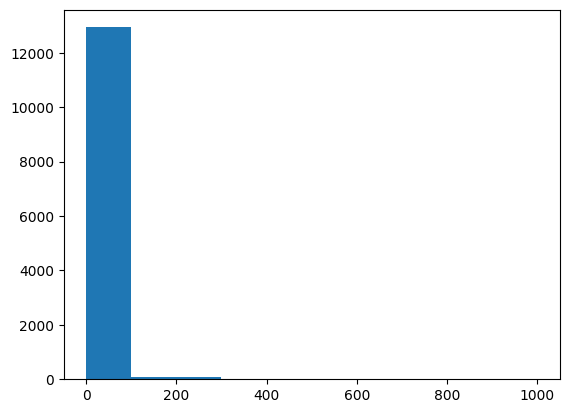

In [ ]:
import matplotlib.pyplot as plt
plt.hist(new_df["IC50"])

In [ ]:
new_df=new_df_copy.copy()

In [ ]:
high_quantile = new_df["IC50"].quantile(0.95)
low_quantile = new_df["IC50"].quantile(0.05)
new_df = new_df[new_df["IC50"] <= high_quantile]
#new_df = new_df[new_df["IC50"] >= low_quantile]

In [ ]:
new_df[new_df.columns[-2]].head()

0    90.4296
1    79.7279
2    77.0531
3    72.5301
4    81.9775
Name: MR, dtype: float64

In [ ]:
ic50_corr = [(new_df["IC50"].corr(new_df[new_df.columns[i]]), new_df.columns[i]) for i in range(2, new_df.shape[1])]
ic50_corr.sort(reverse=True, key = lambda x: abs(x[0]))
ic50_corr[:10]

[(0.16581544483905816, 'LogP'),
 (0.155420387143069, 'RingCount'),
 (-0.08168911781405208, 'TPSA'),
 (0.08090837530878993, 'MR'),
 (-0.07513769593722654, 'NOCount'),
 (-0.07378635679749306, 'NumHeteroatoms'),
 (-0.06999522708641218, 'NHOHCount'),
 (0.06964908941016107, 'NumValenceElectrons'),
 (0.0694959554516278, 'HeavyAtomCount'),
 (-0.06402579159583019, 'NumHDonors')]

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
features = list(map(lambda x: x[1], ic50_corr[:10]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df[features], new_df["IC50"], test_size=0.7)

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

target_range = np.max(y_test) - np.min(y_test)

percentage_accuracy = (1.0 - (rmse / target_range)) * 100

percentage_accuracy

89.49074399946056

In [ ]:
df2.shape

(1468, 3)

In [ ]:
new_df = None
for subs in unique_substances:
  subdf = df2[df2['SMILES'] == subs]
  df2.loc[df2['SMILES'] == subs, 'IC50'] = np.array([subdf['IC50'].mean()]*subdf.shape[0]).reshape(-1, 1)
  #df.loc[df['SMILES'] == subs, 'CC50-MDCK, mmg/ml'] = np.array([subdf['CC50-MDCK, mmg/ml'].mean()]*subdf.shape[0]).reshape(-1, 1)
  if new_df is None:
    new_df = df2[df2['SMILES'] == subs].head(1)
  else:
    new_df = pd.concat([new_df, df2[df2['SMILES'] == subs].head(1)])

In [ ]:
descriptors = {"HeavyAtomCount": Descriptors.HeavyAtomCount,
               "NHOHCount": Descriptors.NHOHCount,
               "NOCount": Descriptors.NOCount,
               "NumHAcceptors": Descriptors.NumHAcceptors,
               "NumHDonors": Descriptors.NumHDonors,
               "NumHeteroatoms": Descriptors.NumHeteroatoms,
               "NumRotatableBonds": Descriptors.NumRotatableBonds,
               "NumValenceElectrons": Descriptors.NumValenceElectrons,
               "NumAromaticRings": Descriptors.NumAromaticRings,
               "NumAliphaticHeterocycles": Descriptors.NumAliphaticHeterocycles,
               "RingCount": Descriptors.RingCount,
               "MW": Descriptors.MolWt,
               "LogP": Descriptors.MolLogP,
               "MR": Descriptors.MolMR,
               "TPSA": Descriptors.TPSA}
for k, f in descriptors.items():
  col = [f(Chem.MolFromSmiles(i)) for i in np.array(new_df['SMILES'])]
  new_df.insert(loc=new_df.shape[1], column=k, value=col)
new_df.shape

[08:53:19] Conflicting single bond directions around double bond at index 55.
[08:53:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[08:53:20] Conflicting single bond directions around double bond at index 55.
[08:53:20]   BondStereo set to STEREONONE and single bond directions set to NONE.
[08:53:20] Conflicting single bond directions around double bond at index 55.
[08:53:20]   BondStereo set to STEREONONE and single bond directions set to NONE.
[08:53:20] Conflicting single bond directions around double bond at index 55.
[08:53:20]   BondStereo set to STEREONONE and single bond directions set to NONE.
[08:53:21] Conflicting single bond directions around double bond at index 55.
[08:53:21]   BondStereo set to STEREONONE and single bond directions set to NONE.
[08:53:21] Conflicting single bond directions around double bond at index 55.
[08:53:21]   BondStereo set to STEREONONE and single bond directions set to NONE.
[08:53:22] Conflicting single bond direc

(1380, 18)

In [ ]:
x_test, y_test = new_df[features], new_df['IC50']

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

target_range = np.max(y_test) - np.min(y_test)

percentage_accuracy = (1.0 - (rmse / target_range)) * 100

percentage_accuracy

90.03268659513142

**Кластеризация**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(new_df[["IC50"]].join(new_df[list(map(lambda x: x[1], ic50_corr[:10]))]))

In [ ]:
PCA_data = XPCAreduced.reshape(XPCAreduced.shape[1], XPCAreduced.shape[0])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X, Y = PCA_data[0], PCA_data[1]
plt.scatter(X, Y, c = kmeans.labels_, cmap = 'rainbow')

NameError: ignored

In [ ]:
train, test = train_test_split(XPCAreduced, test_size=0.3)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [ ]:
arr = []
for i in range(3, 20):
  kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto", init="k-means++").fit(train)
  labels_train = KMeans(n_clusters=i, random_state=0, n_init="auto", init="k-means++").fit_predict(train)
  labels_test = kmeans.predict(test)
  silhouette_avg = silhouette_score(test, labels_test)
  arr+=[(i, silhouette_avg)]
arr.sort(reverse=True, key = lambda x: x[1])

In [ ]:
arr[:5]

[(4, 0.5557376467808509),
 (3, 0.553800020562987),
 (6, 0.4802283995774344),
 (7, 0.4517699680709042),
 (8, 0.4429412263086492)]

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto", init="k-means++").fit(train)
labels_train = KMeans(n_clusters=3, random_state=0, n_init="auto", init="k-means++").fit_predict(train)
labels_test = kmeans.predict(test)
silhouette_avg = silhouette_score(test, labels_test)
silhouette_avg

0.553800020562987

In [ ]:
len(labels_test)

414

In [ ]:
new_df = new_df_copy.copy()

In [ ]:
xpca = pca.fit_transform(new_df[["IC50"]].join(new_df[list(map(lambda x: x[1], ic50_corr[:10]))]))

PCA_data = xpca.reshape(xpca.shape[1], xpca.shape[0])

arr = kmeans.predict(xpca)

In [ ]:
PCA_data.shape

(2, 15145)

In [ ]:
kmeans.labels_.shape

(966,)

In [ ]:
new_df.shape

(13119, 17)

In [ ]:
len(arr)

15145

In [ ]:
len(list(filter(lambda x: x != 0, arr)))

In [ ]:
df_cluster0 = pd.DataFrame()
for i in range(new_df.shape[0]):
  if arr[i] == 1:
    df_cluster0 = df_cluster0.append(new_df.iloc[i,::], ignore_index = True)
df_cluster0.shape

<ipython-input-72-9cbcc6d83317>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cluster0 = df_cluster0.append(new_df.iloc[i,::], ignore_index = True)


(296, 17)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_cluster0[features], df_cluster0["IC50"], test_size=0.7)

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

target_range = np.max(y_test) - np.min(y_test)

percentage_accuracy = (1.0 - (rmse / target_range)) * 100

percentage_accuracy

92.44470473865813

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
params = {'n_estimators':24,
          'max_depth':5}
n_best, depth_best = 10, 2
best_score = 100000
for n in range(10, 100):
  for depth in range(1, 20):
    params['n_estimators'] = n
    params['max_depth'] = depth
    gbr = GradientBoostingRegressor(**params)
    gbr.fit(x_train, y_train)
    rmse = (mean_squared_error(y_test, gbr.predict(x_test)))**0.5
    if best_score > rmse:
      best_score = rmse
      n_best, depth_best = n, depth
print(best_score, n_best, depth_best)

22.591827097769333 57 3


In [ ]:
gb_percentage = (1.0 - (best_score / target_range)) * 100

In [ ]:
gb_percentage

92.46937996166005